In [3]:
from os import mkdir, listdir, path, rmdir
from PIL import Image
import tensorflow as tf
import numpy as np
from IPython.display import display
import sys
import pathlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import shutil

In [2]:
sys.path.append("../tensorflow/models/research/")
sys.path.append("../tensorflow/models")

In [3]:
from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import label_map_util
from object_detection.utils import ops as utils_ops

In [4]:
!pip install -U --pre tensorflow-gpu=="2.*"
!pip install pycocotools

Requirement already up-to-date: tensorflow-gpu==2.* in /home/juan/anaconda3/envs/tensor/lib/python3.6/site-packages (2.0.0)


In [5]:
%%bash
cd ../tensorflow/models/research/
protoc object_detection/protos/*.proto --python_out=.
pip install .

Processing /home/juan/Documents/Projects/mush/tensorflow/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1018408 sha256=a131292e195a2b3601997e535309a63a576f907197676545cddd380218fb47e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-717h3hrc/wheels/5f/f9/f2/928a2071f1a16274a4414c08690b761ee43c31ebd0a3da077b
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


# Helper Functions

In [25]:
def create_folder(name="./images_app_detection"):
    if not path.exists(name):
        mkdir(name)

def image_list_name(old_name= "./images_app", name="./images_app_detection"):
    
    image_names = {'new':[], 'old':[]}
    create_folder(name)
    for i in listdir(old_name):
        dir_name = path.join(old_name, i)
        new_name = path.join(name, i)
        create_name = create_folder(new_name)
        for j in listdir(dir_name):
            subdir_name = path.join(dir_name, j)
            new_subdir_name = path.join(new_name, j)
            create_folder(new_subdir_name)
            for k in listdir(subdir_name):
                old_image_path = path.join(subdir_name, k)
                new_image_path = path.join(new_subdir_name, k)
                image_names['new'].append(new_image_path)
                image_names['old'].append(old_image_path)
    return image_names
            
def show_inference(model, image_path):
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = np.array(Image.open(image_path))
    image = np.asarray(image_np)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis,...]
    # Actual detection.
    output_dict = run_inference_for_single_image(model, input_tensor)
    print(output_dict['detection_classes'])
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

    display(Image.fromarray(image_np))
    
def run_inference_for_single_image(model, input_tensor):


    # Run inference
    output_dict = model(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.

    num_detections = int(output_dict.pop('num_detections'))
    output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

    return output_dict   

def load_model(model_name):
    base_url = 'http://download.tensorflow.org/models/object_detection/'
    model_file = model_name + '.tar.gz'
    model_dir = tf.keras.utils.get_file(
    fname=model_name, 
    origin=base_url + model_file,
    untar=True)

    model_dir = pathlib.Path(model_dir)/"saved_model"

    model = tf.saved_model.load(str(model_dir))
    model = model.signatures['serving_default']

    return model

# Test

In [24]:
image_list = image_list_name()

In [8]:
model_name = 'faster_rcnn_inception_resnet_v2_atrous_oid_v4_2018_12_12'
detection_model = load_model(model_name)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [9]:
tf.gfile = tf.io.gfile

In [10]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '../tensorflow/models/research/object_detection/data/oid_v4_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [11]:
random_image = np.random.choice(image_list['old'])

{'detection_boxes': <tf.Tensor: id=83131, shape=(1, 100, 4), dtype=float32, numpy=
array([[[0.19321701, 0.1419651 , 0.8427001 , 0.6510559 ],
        [0.06251074, 0.4665951 , 0.4655946 , 0.84689575],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.

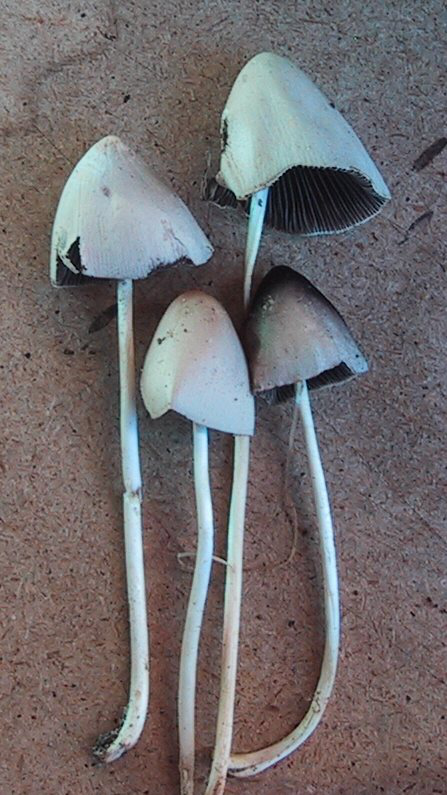

In [12]:
show_inference(detection_model, random_image)

### Create crop and resized image

In [19]:
random_image = np.random.choice(image_list['old'])

In [20]:
def crop_n_resize(model, image_path):
    image_np = np.array(Image.open(image_path))
    image = np.asarray(image_np)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis,...]
    # Actual detection.
    output_dict = run_inference_for_single_image(model, input_tensor)
    
    holder = False
    if np.array([i==315 for i in output_dict['detection_classes']]).any():
        arg = np.argwhere(output_dict['detection_classes']==315)
        box = output_dict['detection_boxes'][arg][0]
        out = tf.squeeze(tf.image.crop_and_resize(image=input_tensor, boxes=box, box_indices=[0],crop_size=image.shape[:2], method='nearest'), axis=0).numpy().astype(np.uint8)
        holder=True
    else:
        out = image_np
    return out, holder


In [21]:
out, holder = crop_n_resize(detection_model, random_image)
holder

{'detection_boxes': <tf.Tensor: id=83178, shape=(1, 100, 4), dtype=float32, numpy=
array([[[0.3096294 , 0.39182612, 0.69631565, 0.64824796],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.

True

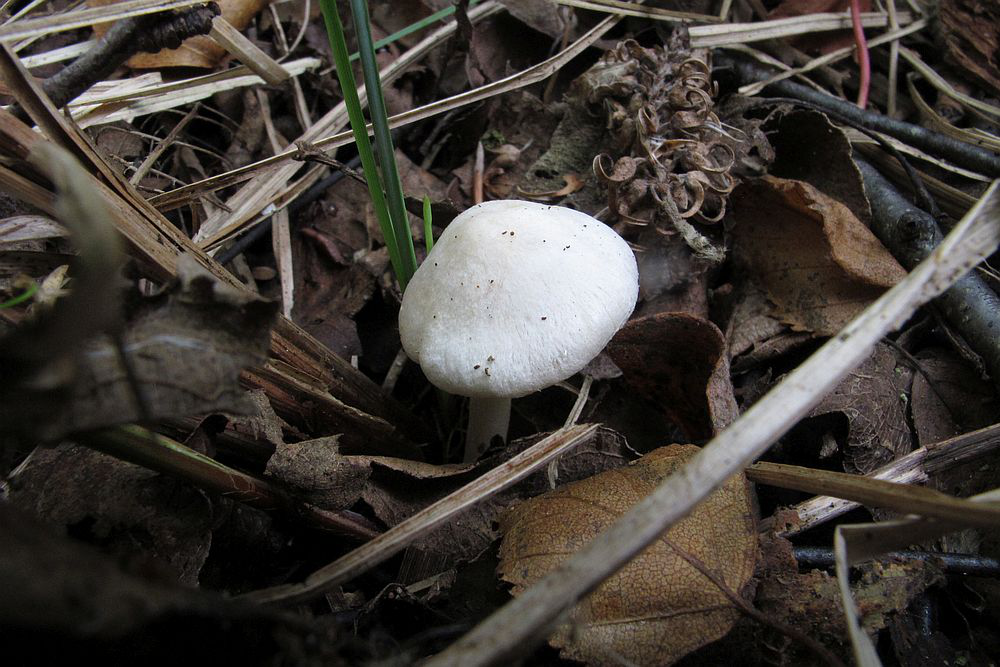

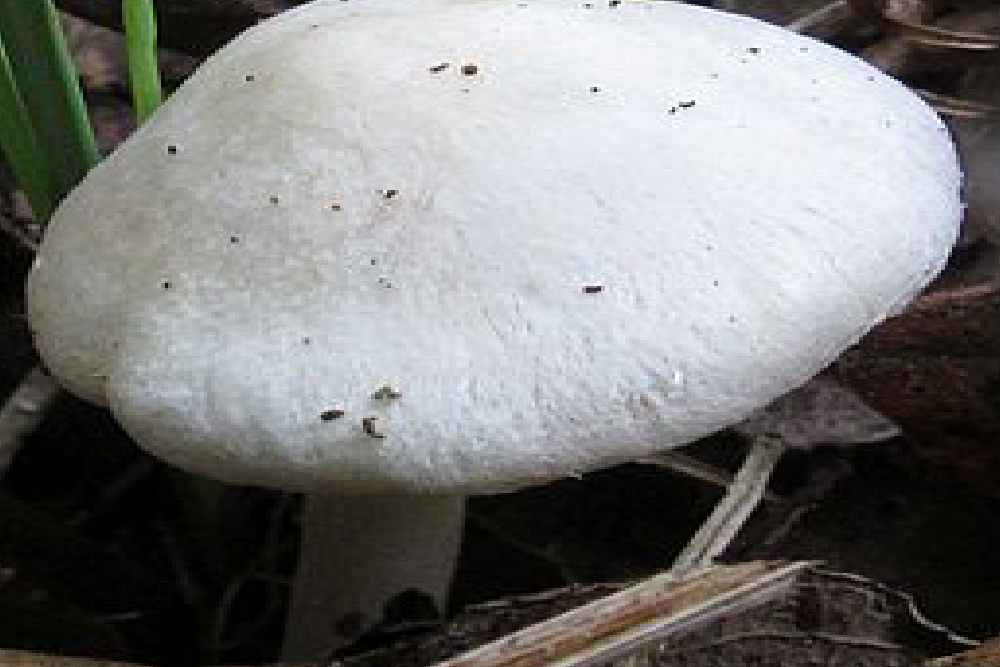

(None, None)

In [22]:
display(Image.open(random_image)), display(Image.fromarray(out))

# Recreate dataset

In [26]:
for i,j in tqdm(zip(image_list['new'], image_list['old']), total=len(image_list['old'])):
    out, holder = crop_n_resize(detection_model, j)
    if holder:
        Image.fromarray(out).save(i)

/home/juan/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [2]:
def folder_checker():
    name="./images_app_detection"
    for i in listdir(name):
        sub_name = path.join(name, i)
        print(" ")
        for j in listdir(sub_name):
            sub_sub_name = path.join(sub_name, j)
            if len(listdir(sub_sub_name)) == 0:
                rmdir(sub_sub_name)
    

In [34]:
folder_checker()

In [30]:
def cross_folder():
    name="./images_app_detection"
    dic = {}
    for i in listdir(name):
        sub_name = path.join(name, i)
        dic[i] = []
        for j in listdir(sub_name):
            sub_sub_name = path.join(sub_name, j)
            dic[i].append(j)
    
    for i in ['test', 'val']:
        sub_name = path.join(name, i)
        for j in listdir(sub_name):
            sub_sub_name = path.join(sub_name, j)
            if j not in dic['train']:
                shutil.rmtree(sub_sub_name)

In [31]:
cross_folder()

In [28]:
def remove_folders_w_less(n=10):
    name="./images_app_detection"

    for i in ['train']:
        sub_name = path.join(name, i)
        for j in listdir(sub_name):
            sub_sub_name = path.join(sub_name, j)
            if len(listdir(sub_sub_name)) < 10:
                shutil.rmtree(sub_sub_name)
                for k in ['test', 'val']:
                    try:
                        sub_t_name = path.join(name, k, j)
                        shutil.rmtree(sub_t_name)
                    except:
                        pass


In [29]:
remove_folders_w_less()